In [1]:
import os
from numpy.random import seed
from tensorflow import set_random_seed

In [2]:
def search_dir(type="normal", num=6):
  #Helper function to scan contents of directory
  counter=0

  for file in os.listdir(train_dir + type.upper()+ "/"):
      if counter == num:
          break

      if file.endswith(".jpeg"):
          print(file)

      counter += 1

In [3]:
def plot_images(type="normal", num=6):
  #Helper function to plot images
  counter=0
  fig = plt.figure(figsize=(10, 7))
  

  for file in os.listdir(train_dir + type.upper()):

      if file.endswith(".jpeg"):
          if counter == num:
              break

          img = mpimg.imread(train_dir + type.upper()+"/"+file)
          plt.subplot(231+counter)
          plt.title(file.split('.')[0])
          imgplot = plt.imshow(img)

          counter += 1

In [4]:
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
# Point to directories
train_dir = "../PneumoniaDetection/chest_xray/chest_xray/train/"

test_dir = "../PneumoniaDetection/chest_xray/chest_xray/val/"

val_dir = "../PneumoniaDetection/chest_xray/chest_xray/test/"

In [7]:
search_dir(type="pneumonia", num=50)

person1000_bacteria_2931.jpeg
person1000_virus_1681.jpeg
person1001_bacteria_2932.jpeg
person1002_bacteria_2933.jpeg
person1003_bacteria_2934.jpeg
person1003_virus_1685.jpeg
person1004_bacteria_2935.jpeg
person1004_virus_1686.jpeg
person1005_bacteria_2936.jpeg
person1005_virus_1688.jpeg
person1006_bacteria_2937.jpeg
person1007_bacteria_2938.jpeg
person1007_virus_1690.jpeg
person1008_bacteria_2939.jpeg
person1008_virus_1691.jpeg
person1009_virus_1694.jpeg
person100_virus_184.jpeg
person1010_bacteria_2941.jpeg
person1010_virus_1695.jpeg
person1011_bacteria_2942.jpeg
person1012_bacteria_2943.jpeg
person1014_bacteria_2945.jpeg
person1015_virus_1701.jpeg
person1015_virus_1702.jpeg
person1016_bacteria_2947.jpeg
person1016_virus_1704.jpeg
person1017_bacteria_2948.jpeg
person1018_bacteria_2949.jpeg
person1018_virus_1706.jpeg
person1019_bacteria_2950.jpeg
person1019_virus_1707.jpeg
person1019_virus_1708.jpeg
person101_virus_187.jpeg
person101_virus_188.jpeg
person1020_bacteria_2951.jpeg
person1

In [8]:
search_dir(type="normal", num=50)

IM-0115-0001.jpeg
IM-0117-0001.jpeg
IM-0119-0001.jpeg
IM-0122-0001.jpeg
IM-0125-0001.jpeg
IM-0127-0001.jpeg
IM-0128-0001.jpeg
IM-0129-0001.jpeg
IM-0131-0001.jpeg
IM-0133-0001.jpeg
IM-0135-0001.jpeg
IM-0137-0001.jpeg
IM-0140-0001.jpeg
IM-0141-0001.jpeg
IM-0143-0001.jpeg
IM-0145-0001.jpeg
IM-0147-0001.jpeg
IM-0149-0001.jpeg
IM-0151-0001.jpeg
IM-0152-0001.jpeg
IM-0154-0001.jpeg
IM-0156-0001.jpeg
IM-0158-0001.jpeg
IM-0160-0001.jpeg
IM-0162-0001.jpeg
IM-0164-0001.jpeg
IM-0166-0001.jpeg
IM-0168-0001.jpeg
IM-0170-0001.jpeg
IM-0172-0001.jpeg
IM-0176-0001.jpeg
IM-0177-0001.jpeg
IM-0178-0001.jpeg
IM-0180-0001.jpeg
IM-0182-0001.jpeg
IM-0183-0001.jpeg
IM-0185-0001.jpeg
IM-0187-0001.jpeg
IM-0189-0001.jpeg
IM-0191-0001.jpeg
IM-0193-0001.jpeg
IM-0195-0001.jpeg
IM-0199-0001.jpeg
IM-0201-0001.jpeg
IM-0203-0001.jpeg
IM-0205-0001.jpeg
IM-0206-0001.jpeg
IM-0207-0001.jpeg
IM-0209-0001.jpeg


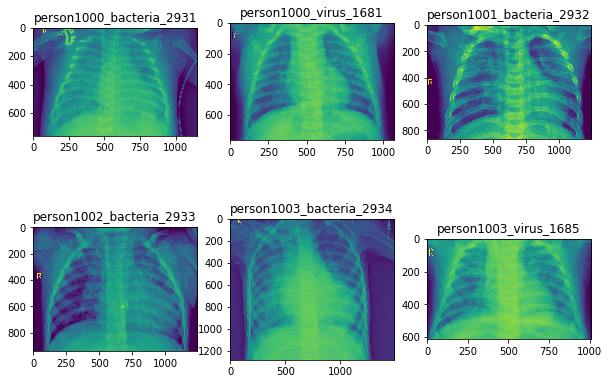

In [9]:
plot_images(type="pneumonia", num=6)

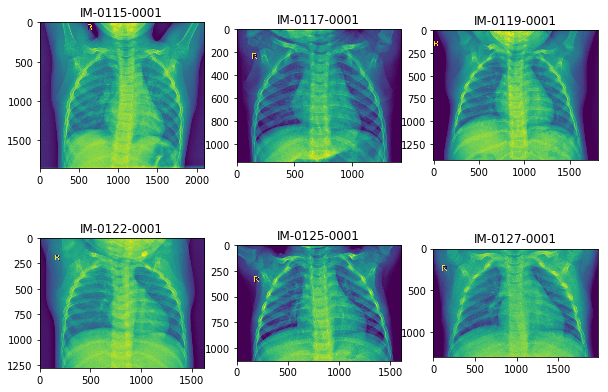

In [10]:
plot_images(type="normal", num=6)

In [11]:
import numpy as np

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions

from tensorflow.python.keras.preprocessing import image

Using TensorFlow backend.


In [12]:
pre_model = InceptionV3(weights='imagenet')

**Pre-processing**

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
batch_size=163
# training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1) 

In [15]:
train_generator = train_datagen.flow_from_directory(
        train_dir, # directory that contains training data
        target_size=(150, 150), # img size
        batch_size=batch_size, # of files to read at a time 163
        class_mode="categorical")

Found 5216 images belonging to 2 classes.


In [16]:
# Create validation data generator

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode="categorical")

Found 624 images belonging to 2 classes.


In [17]:
# Create test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode="categorical",
        shuffle=False)

Found 16 images belonging to 2 classes.


In [18]:
import keras

In [19]:
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)


for layer in base_model.layers:
  layer.trainable = False  # Freeze the layers not to train
  
final_model = keras.models.Model(inputs=base_model.inputs, outputs=predictions) #create final model

In [20]:
final_model.compile(loss ="categorical_crossentropy",
                    optimizer = "Adam", 
                    metrics=["accuracy"])

In [21]:
fit_history = final_model.fit_generator(
        train_generator, #train data generator 
        steps_per_epoch=len(train_generator),
        epochs=5,
        validation_data=val_generator, #validation data generator 
        validation_steps=len(val_generator))


Epoch 1/5
32/32 [==============================] - 331s 10s/step - loss: 0.5715 - accuracy: 0.8223 - val_loss: 2.0633 - val_accuracy: 0.6154
Epoch 2/5
32/32 [==============================] - 319s 10s/step - loss: 0.2448 - accuracy: 0.9086 - val_loss: 1.6194 - val_accuracy: 0.5946
Epoch 3/5
32/32 [==============================] - 319s 10s/step - loss: 0.2295 - accuracy: 0.9076 - val_loss: 1.3224 - val_accuracy: 0.6859
Epoch 4/5
32/32 [==============================] - 319s 10s/step - loss: 0.2233 - accuracy: 0.9133 - val_loss: 1.5726 - val_accuracy: 0.7147
Epoch 5/5
32/32 [==============================] - 319s 10s/step - loss: 0.2244 - accuracy: 0.9101 - val_loss: 1.2485 - val_accuracy: 0.6875


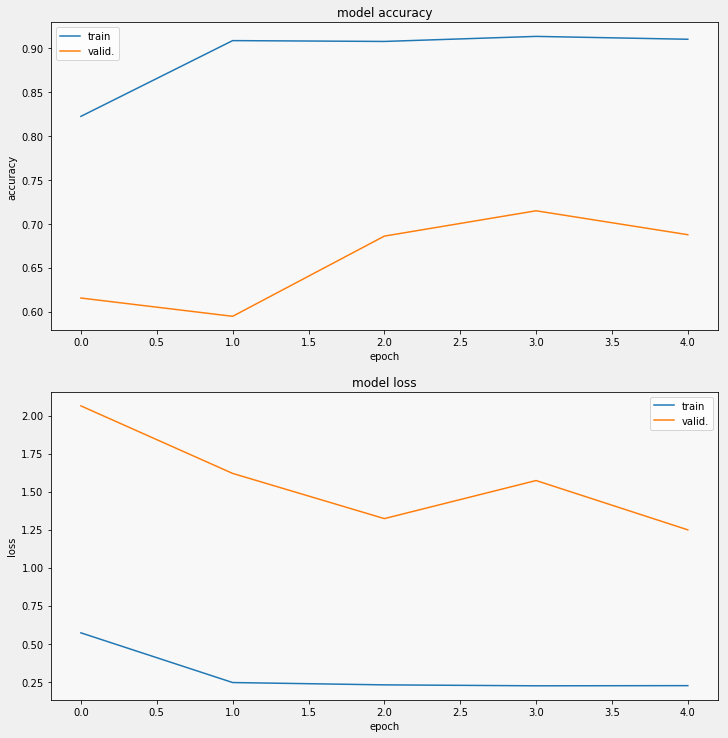

In [22]:
display_training_curves(fit_history.history['accuracy'], fit_history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(fit_history.history['loss'], fit_history.history['val_loss'], 'loss', 212)

In [23]:
result  = final_model.evaluate_generator(test_generator,steps=len(test_generator))
print('Loss:', result[0])
print('Accuracy:', result[1])

Loss: 7.014689922332764
Accuracy: 0.75
